In [82]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from pathlib import Path
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.utils import shuffle
from sklearn.dummy import DummyRegressor
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_curve, roc_auc_score,log_loss, classification_report,r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter


In [2]:
!gdown 1vDIXh1yJxLpmgdh3gZGM6WX0u3GCPuIS

Downloading...
From: https://drive.google.com/uc?id=1vDIXh1yJxLpmgdh3gZGM6WX0u3GCPuIS
To: /content/knn_imputation.csv
100% 12.9k/12.9k [00:00<00:00, 39.5MB/s]


In [8]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 27.9MB/s]


In [10]:
dataset=pd.read_csv('multiclass.csv')
dataset.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [16]:
dataset.columns, dataset.shape

(Index(['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
        'Delicassen', 'class'],
       dtype='object'),
 (440, 8))

In [17]:
dataset.isnull().sum()

,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0
class,0


In [29]:
dataset.dropna()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,285,9656,7561,214,2674,1338,2
1,3,190,9810,9568,1762,3293,1776,2
2,3,179,8808,7684,2405,3516,7844,2
3,3,291,1196,4221,6404,507,1788,1
4,3,369,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...,...
435,3,396,12051,16027,13135,182,2204,2
436,3,414,1431,764,4510,93,2346,2
437,3,302,15488,30243,437,14841,1867,2
438,3,246,1981,2232,1038,168,2125,3


In [30]:
dataset['Region'].unique()
dataset.columns.tolist()

['Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen',
 'class']

In [31]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

In [32]:
minmax=MinMaxScaler()
minmax_data=minmax.fit_transform(dataset)

In [33]:
print(scaled_data,minmax_data)

[[ 0.59066829  0.55927062  0.52356777 ... -0.04356873 -0.06633906
  -0.26290476]
 [ 0.59066829 -0.20080065  0.54445767 ...  0.08640684  0.08915105
  -0.26290476]
 [ 0.59066829 -0.2888089   0.40853771 ...  0.13323164  2.24329255
  -0.26290476]
 ...
 [ 0.59066829  0.69528337  1.31467078 ...  2.51121768  0.12145607
  -0.26290476]
 [ 0.59066829  0.24724136 -0.51753572 ... -0.56977032  0.21304614
   1.08218935]
 [ 0.59066829 -0.98487416 -0.5559243  ... -0.50488752 -0.52286938
   1.08218935]] [[1.         0.65972222 0.13072723 ... 0.0654272  0.02784731 0.5       ]
 [1.         0.43981481 0.13282409 ... 0.08058985 0.03698373 0.5       ]
 [1.         0.41435185 0.11918086 ... 0.08605232 0.16355861 0.5       ]
 ...
 [1.         0.69907407 0.21013575 ... 0.36346267 0.03888194 0.5       ]
 [1.         0.56944444 0.02622442 ... 0.00404174 0.04426366 1.        ]
 [1.         0.21296296 0.02237109 ... 0.01161082 0.00102211 1.        ]]


In [34]:
encoder = LabelEncoder()
dataset['Fresh'] = encoder.fit_transform(dataset['Fresh'])

In [47]:
x = dataset[['Region','Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen','class']]
y = dataset['class']
x,y= shuffle(x,y,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [50]:
class_counts = Counter(y)
print("Class distribution:", class_counts)

Class distribution: Counter({2: 180, 3: 173, 1: 87})


In [49]:
smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(x, y)

In [57]:
print(X_resampled.shape,y_resampled.shape)
print(Counter(y_resampled))

(540, 7) (540,)
Counter({2: 180, 3: 180, 1: 180})


In [60]:
print(X_resampled.describe())


           Region          Milk       Grocery        Frozen  Detergents_Paper  \
count  540.000000    540.000000    540.000000    540.000000        540.000000   
mean     2.501852   5210.679630   7086.979630   3210.907407       2477.250000   
std      0.786007   6822.087156   8811.179436   4801.284385       4396.102251   
min      1.000000     55.000000      3.000000     25.000000          3.000000   
25%      2.000000   1445.000000   2062.000000    824.000000        256.000000   
50%      3.000000   3251.000000   4060.500000   1690.000000        700.000000   
75%      3.000000   6338.500000   8823.500000   3746.750000       3140.750000   
max      3.000000  73498.000000  92780.000000  60869.000000      40827.000000   

         Delicassen       class  
count    540.000000  540.000000  
mean    1471.277778    2.000000  
std     2586.696970    0.817254  
min        3.000000    1.000000  
25%      426.250000    1.000000  
50%      962.500000    2.000000  
75%     1774.250000    3.000000 

In [61]:
print(X_resampled.mean())

Region                 2.501852
Milk                5210.679630
Grocery             7086.979630
Frozen              3210.907407
Detergents_Paper    2477.250000
Delicassen          1471.277778
class                  2.000000
dtype: float64


In [62]:
print(X_resampled.median())

Region                 3.0
Milk                3251.0
Grocery             4060.5
Frozen              1690.0
Detergents_Paper     700.0
Delicassen           962.5
class                  2.0
dtype: float64


In [63]:
print(X_resampled.var())

Region              6.178073e-01
Milk                4.654087e+07
Grocery             7.763688e+07
Frozen              2.305233e+07
Detergents_Paper    1.932572e+07
Delicassen          6.691001e+06
class               6.679035e-01
dtype: float64


In [74]:
pip install statsmodels

           Region          Milk       Grocery        Frozen  Detergents_Paper  \
count  540.000000    540.000000    540.000000    540.000000        540.000000   
mean     2.501852   5210.679630   7086.979630   3210.907407       2477.250000   
std      0.786007   6822.087156   8811.179436   4801.284385       4396.102251   
min      1.000000     55.000000      3.000000     25.000000          3.000000   
25%      2.000000   1445.000000   2062.000000    824.000000        256.000000   
50%      3.000000   3251.000000   4060.500000   1690.000000        700.000000   
75%      3.000000   6338.500000   8823.500000   3746.750000       3140.750000   
max      3.000000  73498.000000  92780.000000  60869.000000      40827.000000   

         Delicassen       class  
count    540.000000  540.000000  
mean    1471.277778    2.000000  
std     2586.696970    0.817254  
min        3.000000    1.000000  
25%      426.250000    1.000000  
50%      962.500000    2.000000  
75%     1774.250000    3.000000 

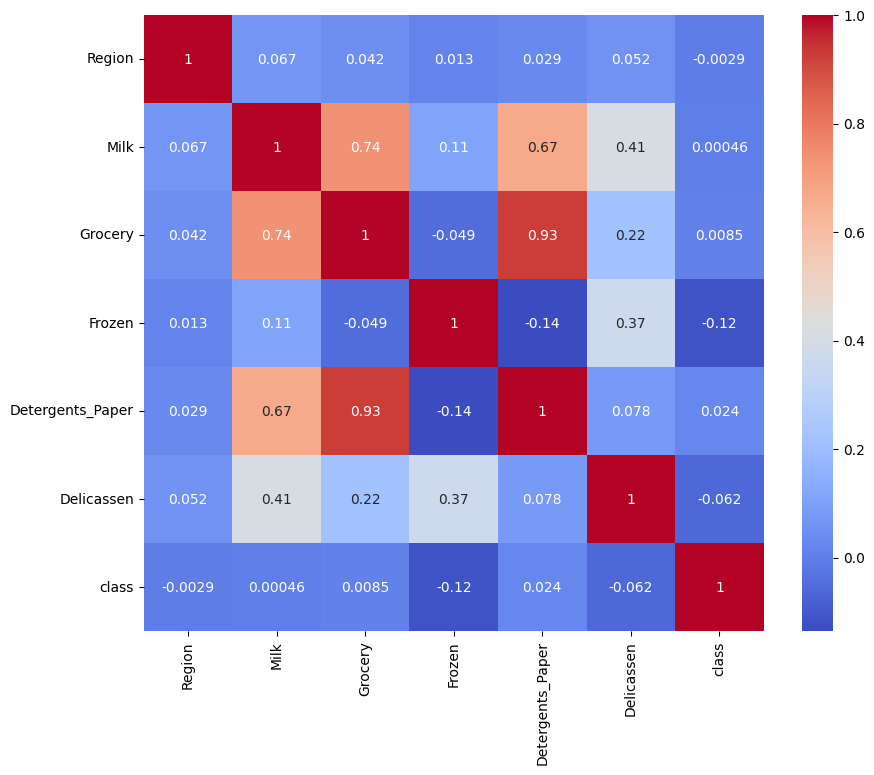

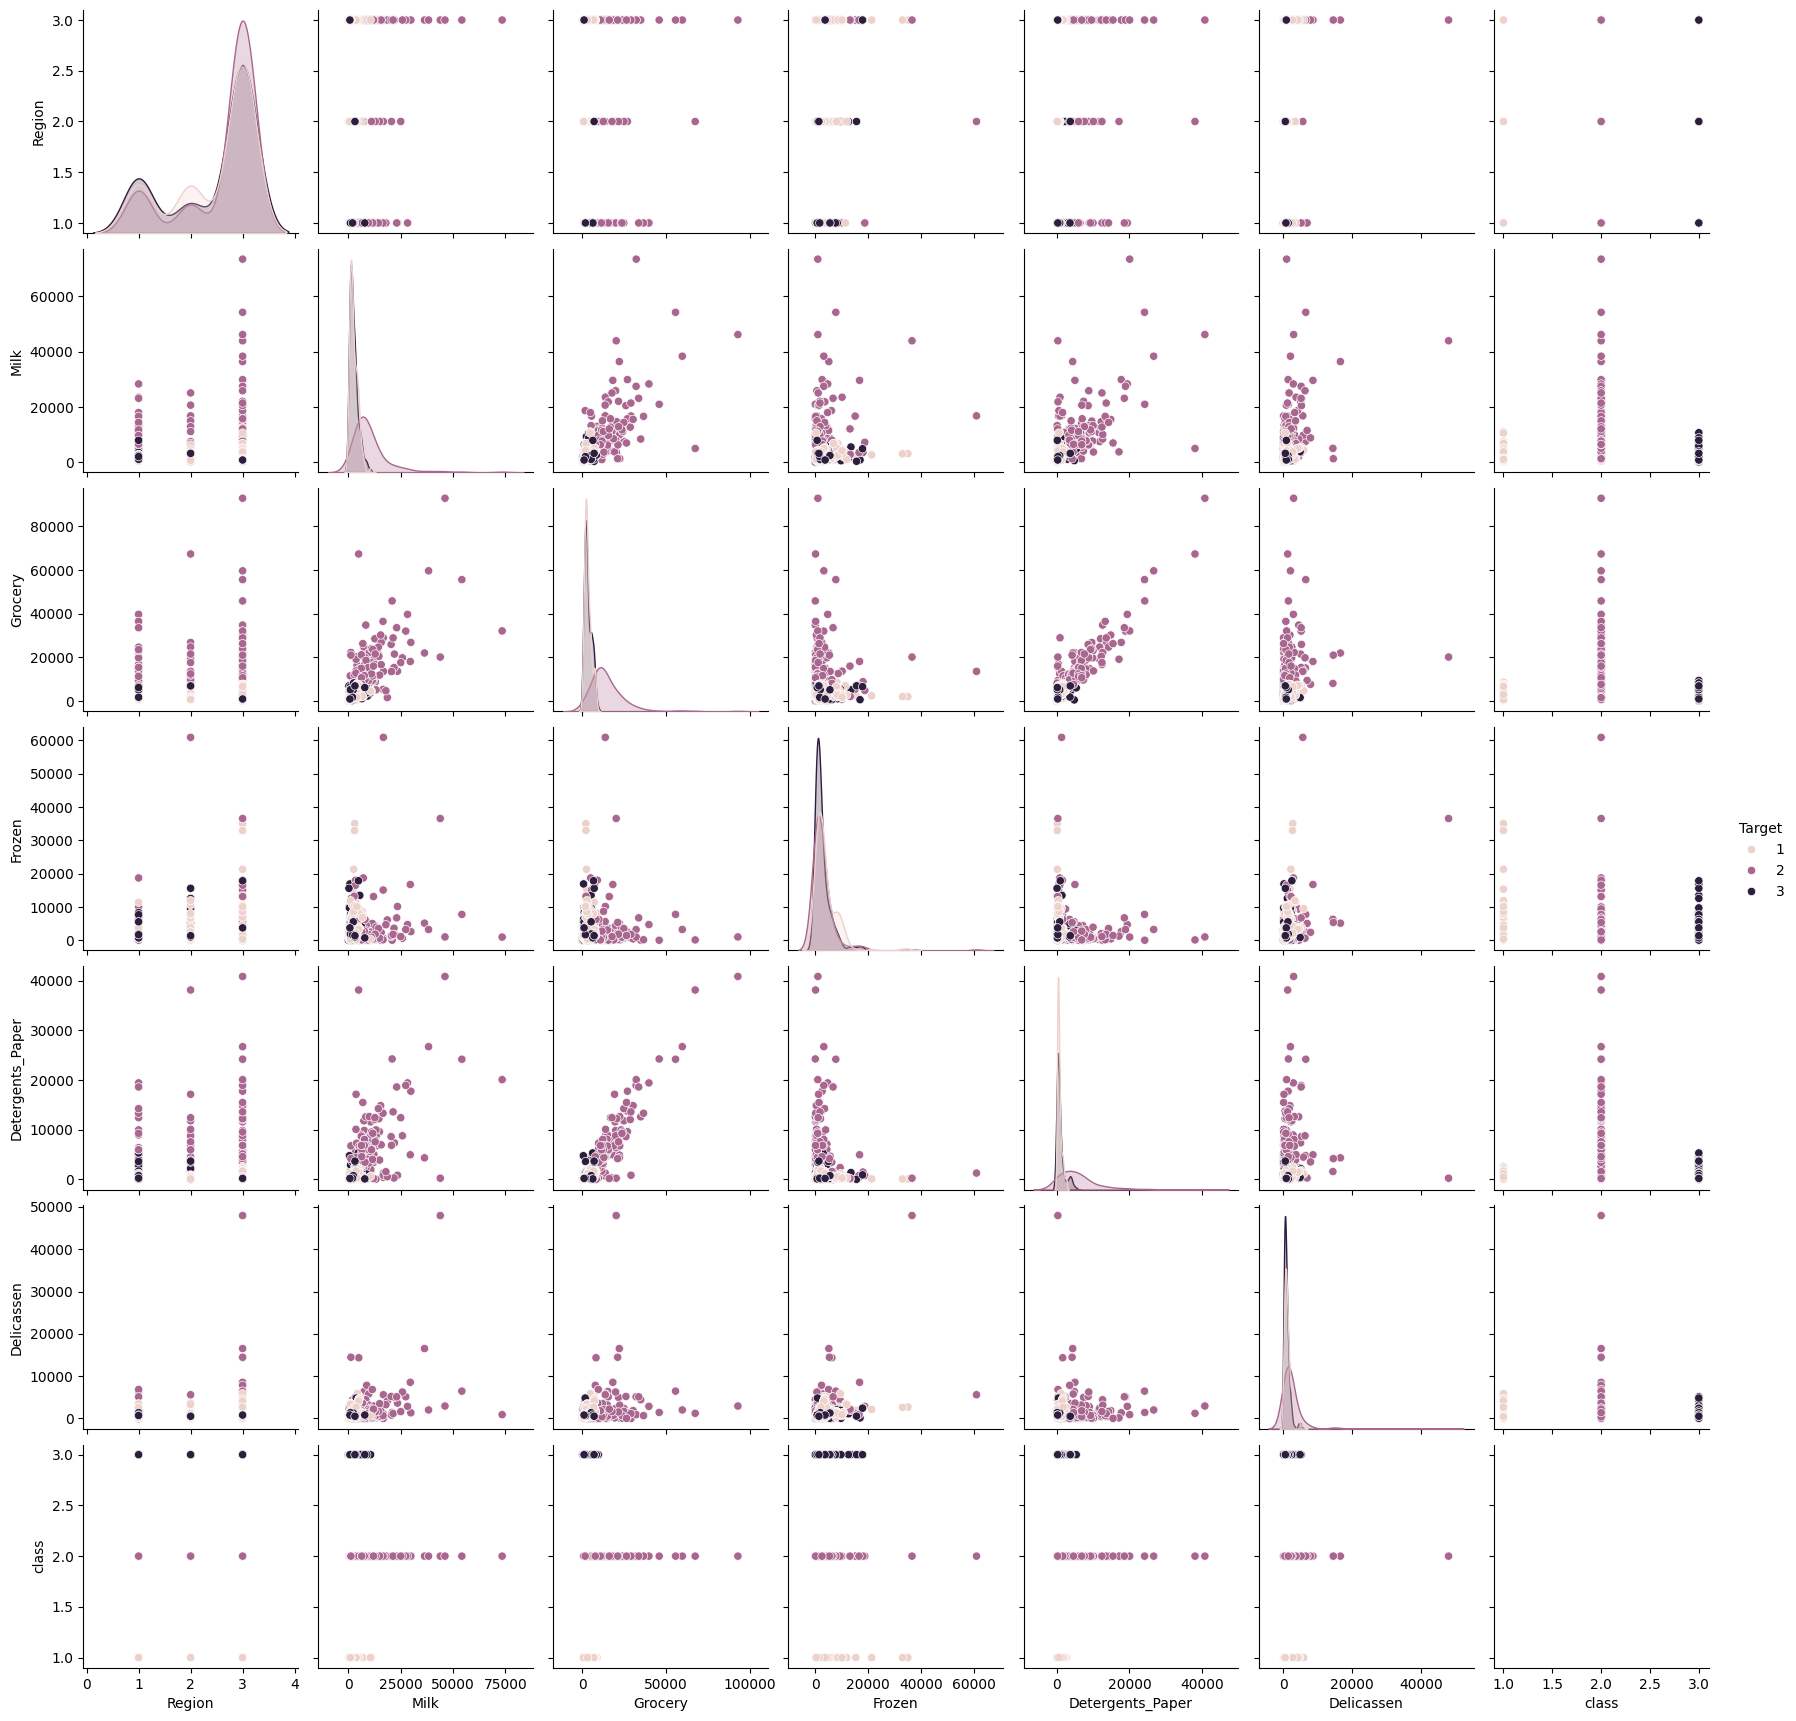

          Region                    Milk                    Grocery  \
            mean       std          mean          std          mean   
Target                                                                
1       2.455556  0.786210   2600.677778  1918.361774   3099.138889   
2       2.600000  0.736897  10423.061111  9562.337412  14880.361111   
3       2.450000  0.827428   2608.300000  2010.755524   3281.438889   

                           Frozen              Detergents_Paper               \
                 std         mean          std             mean          std   
Target                                                                         
1        1925.679240  3970.238889  4704.151298       611.477778   583.440963   
2       11575.676425  3074.405556  6067.591634      5954.961111  6186.810568   
3        2107.772700  2588.077778  3079.160495       865.311111  1140.433492   

         Delicassen              class       
               mean          std  mean  std  


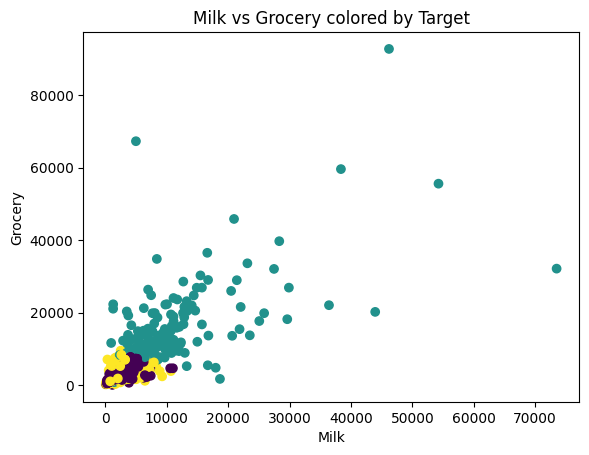

            Feature        VIF
0            Region   5.274088
1              Milk   4.094524
2           Grocery  14.452054
3            Frozen   1.705549
4  Detergents_Paper  10.533136
5        Delicassen   1.981497
6             class   4.619125


In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_df = pd.DataFrame(X_resampled, columns=['Region','Milk','Grocery','Frozen','Detergents_Paper','Delicassen','class'])
y_series = pd.Series(y_resampled, name='Target')

print(X_df.describe())
print(X_df.var())
for col in ['Region','class']:
    print(f"\n{col}:\n", X_df[col].value_counts())

corr_matrix = X_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

data = pd.concat([X_df, y_series], axis=1)
sns.pairplot(data, hue='Target')
plt.show()

grouped_stats = data.groupby('Target').agg(['mean','std'])
print(grouped_stats)

plt.scatter(X_df['Milk'], X_df['Grocery'], c=y_series)
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.title('Milk vs Grocery colored by Target')
plt.show()

vif_data = pd.DataFrame()
vif_data["Feature"] = X_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
print(vif_data)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [77]:
pearson_corr = X_df.corr(method='pearson')
print(pearson_corr)

                    Region      Milk   Grocery    Frozen  Detergents_Paper  \
Region            1.000000  0.066899  0.041942  0.013236          0.028950   
Milk              0.066899  1.000000  0.736352  0.108238          0.669600   
Grocery           0.041942  0.736352  1.000000 -0.049034          0.925454   
Frozen            0.013236  0.108238 -0.049034  1.000000         -0.135835   
Detergents_Paper  0.028950  0.669600  0.925454 -0.135835          1.000000   
Delicassen        0.052340  0.405518  0.215861  0.367491          0.078275   
class            -0.002888  0.000457  0.008454 -0.117633          0.023594   

                  Delicassen     class  
Region              0.052340 -0.002888  
Milk                0.405518  0.000457  
Grocery             0.215861  0.008454  
Frozen              0.367491 -0.117633  
Detergents_Paper    0.078275  0.023594  
Delicassen          1.000000 -0.062098  
class              -0.062098  1.000000  


In [80]:
corr_matrix = X_df.corr(method='pearson')
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [(col1, col2, upper_tri.loc[col1, col2])
             for col1 in upper_tri.columns
             for col2 in upper_tri.index
             if pd.notnull(upper_tri.loc[col1, col2]) and upper_tri.loc[col1, col2] > 0.7]

print("Highly correlated feature pairs (correlation > 0.7):")
for pair in high_corr:
    print(pair)

Highly correlated feature pairs (correlation > 0.7):
('Milk', 'Grocery', np.float64(0.7363518666408759))
('Grocery', 'Detergents_Paper', np.float64(0.9254543011387614))


In [96]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
k = 5
knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [93]:
print(y_pred)

[2 2 2 3 2 2 2 2 2 1 1 2 3 1 2 2 2 3 3 2 3 2 2 3 2 1 2 2 3 3 1 1 3 3 1 3 3
 3 3 3 3 3 2 3 2 2 2 2 2 3 2 3 2 2 2 3 2 2 2 3 1 3 2 3 2 3 1 2 2 1 3 2 3 2
 1 3 1 2 2 3 2 3 2 3 2 1 2 2]


In [86]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[13  0  0]
 [ 0 44  0]
 [ 0  0 31]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        31

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88



In [90]:
xq_scaled = scaler.transform(X_resampled)
predicted_class = knn.predict(xq_scaled)
print("Predicted class label:", predicted_class[0])

Predicted class label: 2


In [92]:
xq_scaled = scaler.transform(X_resampled)
distances, indices = knn.kneighbors(xq_scaled, n_neighbors=k)
print(indices)
print(distances)
nearest_neighbors = X_train.iloc[indices[0]]
print(nearest_neighbors)
predicted_class = knn.predict(xq_scaled)
print(predicted_class[0])

[[ 84 327 289 307 298]
 [282  57 113 248  49]
 [114  55 195  20 343]
 ...
 [345 285  96 176  81]
 [292  43 346 142  68]
 [279 186  30 169 111]]
[[1.67022848 2.62831469 2.71190474 2.71418081 2.77965973]
 [0.         0.08739597 0.16232789 0.19739684 0.20127511]
 [0.         0.36170702 0.49185692 0.52392635 0.55093858]
 ...
 [0.00920161 0.07661754 0.12141422 0.26283634 0.26953986]
 [0.15653975 0.16378385 0.18560141 0.24267565 0.25531424]
 [0.01316332 0.4685262  0.69208363 0.74241726 0.7890684 ]]
     Region   Milk  Grocery  Frozen  Detergents_Paper  Delicassen  class
254       1  17972     4748    4686              1547        3265      2
315       2  14982    11924     662              3891        3508      2
309       2  20655    13567    1465              6846         806      2
215       1  10765    15538    1374              5828        2388      2
266       1   9763    22182    2221              4882        2563      2
2
